In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [2]:
def visualize_prediction(confidence, first_f, last_f, no_features, name_time_column, dataframe, title, location_line, line=False):
    fig, axes = plt.subplots(2, 2, figsize=(15,15), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    for i in range(first_f,last_f):
        # Target values (actual sensor values)
        sns.scatterplot(data=dataframe, 
                        x=name_time_column, 
                        y=columns[i], 
                        ax=ax[i-first_f], 
                        label="target", 
                        palette="Greys")
        
        # Predicted mu
        sns.lineplot(data=dataframe, 
                     x=name_time_column, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_f], 
                     label="predicted", 
                     palette="Blues")
        
        # Confidence bound (+- 2 sigma)
        ax[i-first_f].fill_between(dataframe[i+no_features].values - confidence * dataframe[i+2*no_features].values, 
                              dataframe[i+no_features].values + confidence * dataframe[i+2*no_features].values, 
                              alpha=0.2, 
                              color='blue')
        if line:
            ax[i-first_f].axvline(location_line, 0,2, color="r", linestyle ="--", linewidth=1, label="train-validation")
        ax[i-first_f].set(xlabel='up time', ylabel='sensor value')
        ax[i-first_f].set(title=columns[i])
        plt.setp(ax[i-first_f].get_xticklabels(), rotation=45) 
    fig.suptitle(title)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [3]:
def smooth_data(df, rate, columns):
    new_df = pd.DataFrame(columns=["up time", "ongoing time"]+columns)
    for column in columns:
        smoothed_data = []
        for i,value in enumerate(df.loc[:,column]):
            if i==0:
                smoothed_data.append(value)
            else:
                x = rate  * value + (1 - rate) * smoothed_data[-1]
                smoothed_data.append(x)
        new_df.loc[:,column]=smoothed_data
        new_df.loc[:,"up time"] = df.loc[:,"up time"]
        new_df.loc[:,"ongoing time"] = df.loc[:,"ongoing time"]
        
    return new_df

In [4]:
def visualise_mle_prediction(dataframe, time_column, no_features, first_feature, last_feature, breakdown, line=False):
    fig, axes = plt.subplots(no_features, 1, figsize=(30,40))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe[time_column]
    for i in range(first_feature, last_feature):
        # Values for drawing lower and upper bound
        target = dataframe.iloc[:,i].values
        mu = dataframe.iloc[:,i+no_features].values
        sigma = dataframe.iloc[:,i+2*no_features].values
        lower_bound = mu - 2*sigma
        upper_bound = mu + 2* sigma
        
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+4*no_features+1].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["blue"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["blue","red"]

        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_feature], 
                     color="black")
        ax[i-first_feature].fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5)
        if line:
            ax[i-first_feature].axvline(breakdown, 0,2, color="r", linestyle ="--", linewidth=3)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature], 
                        hue=columns[i+4*no_features+1],
                        palette=palette
                        )   

# Visualisation of Prediction - New Machine
## Read data from csv file, which contains all metrics produced during prediction phase

In [12]:
phm_data_1 = pd.read_csv("../../files/prediction/MLE/phm_M02_1.csv", sep=";")

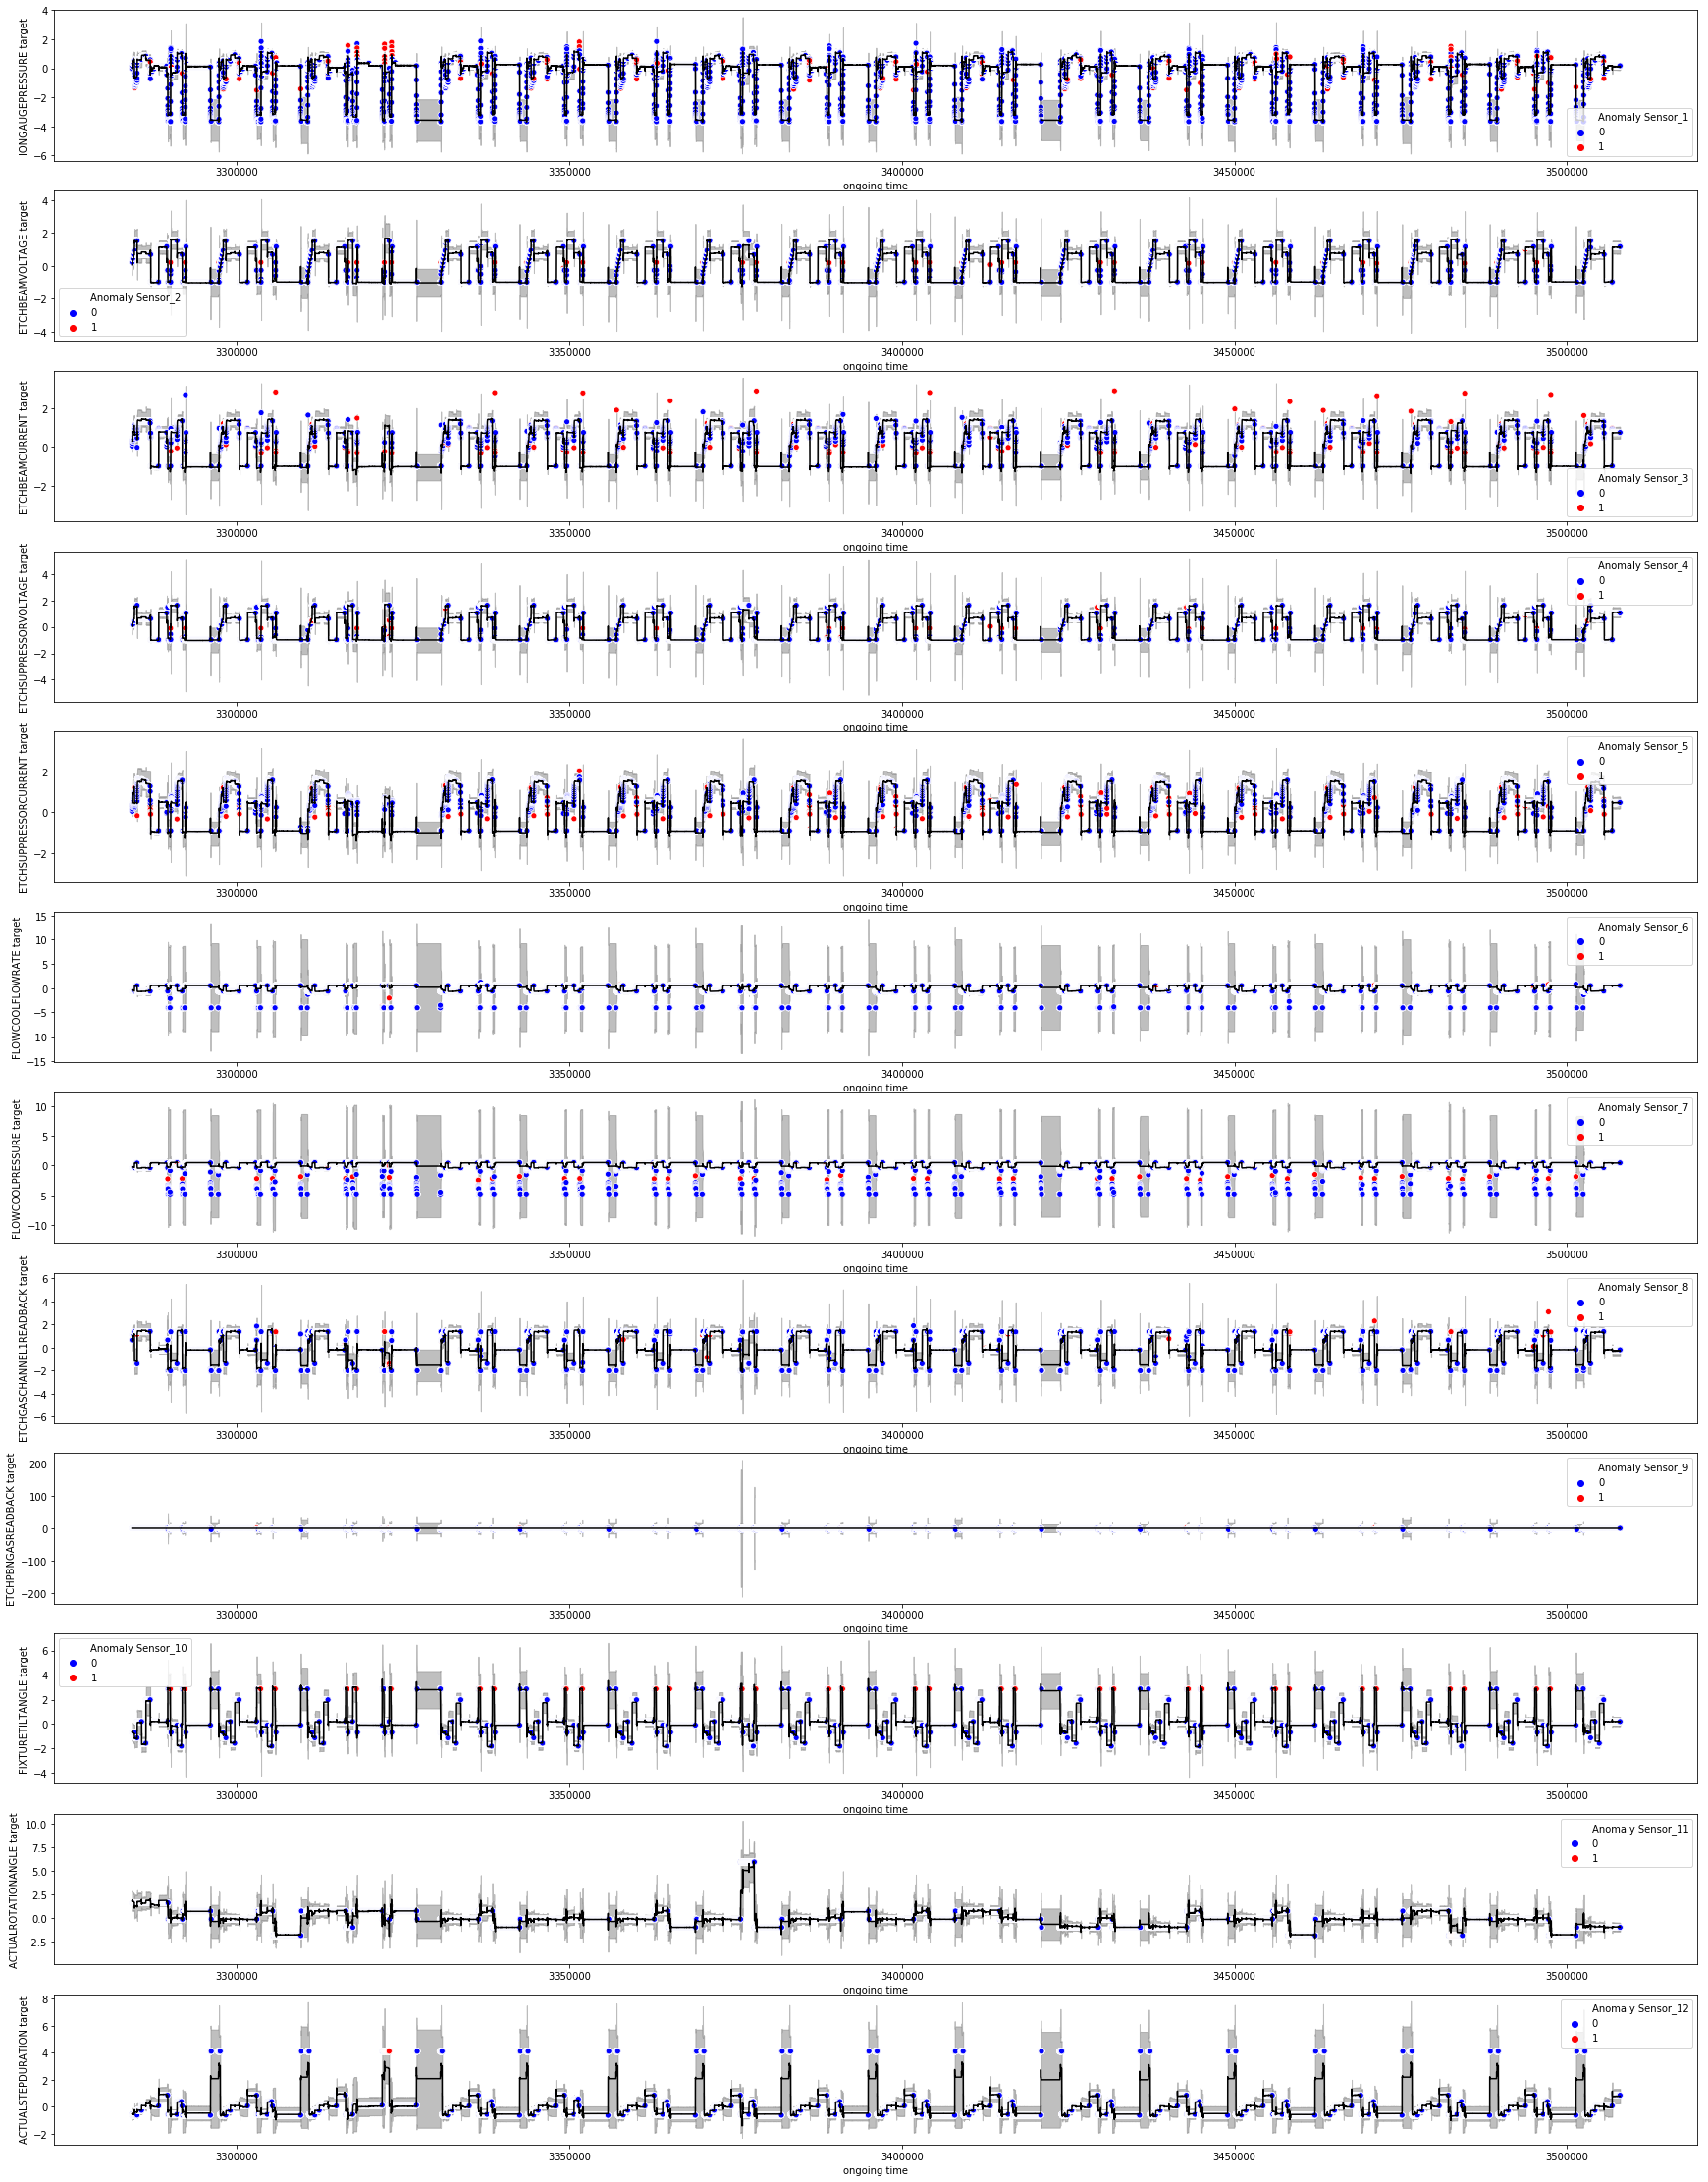

In [9]:
phm_data_11 = phm_data_1.iloc[:50000,:]
visualise_mle_prediction(dataframe = phm_data_11,
                         time_column= "ongoing time",
                         no_features=12, 
                         first_feature=1, 
                         last_feature=13,
                         breakdown=0,
                         line=False
                        )
plt.show()

## Detail view before failure occures

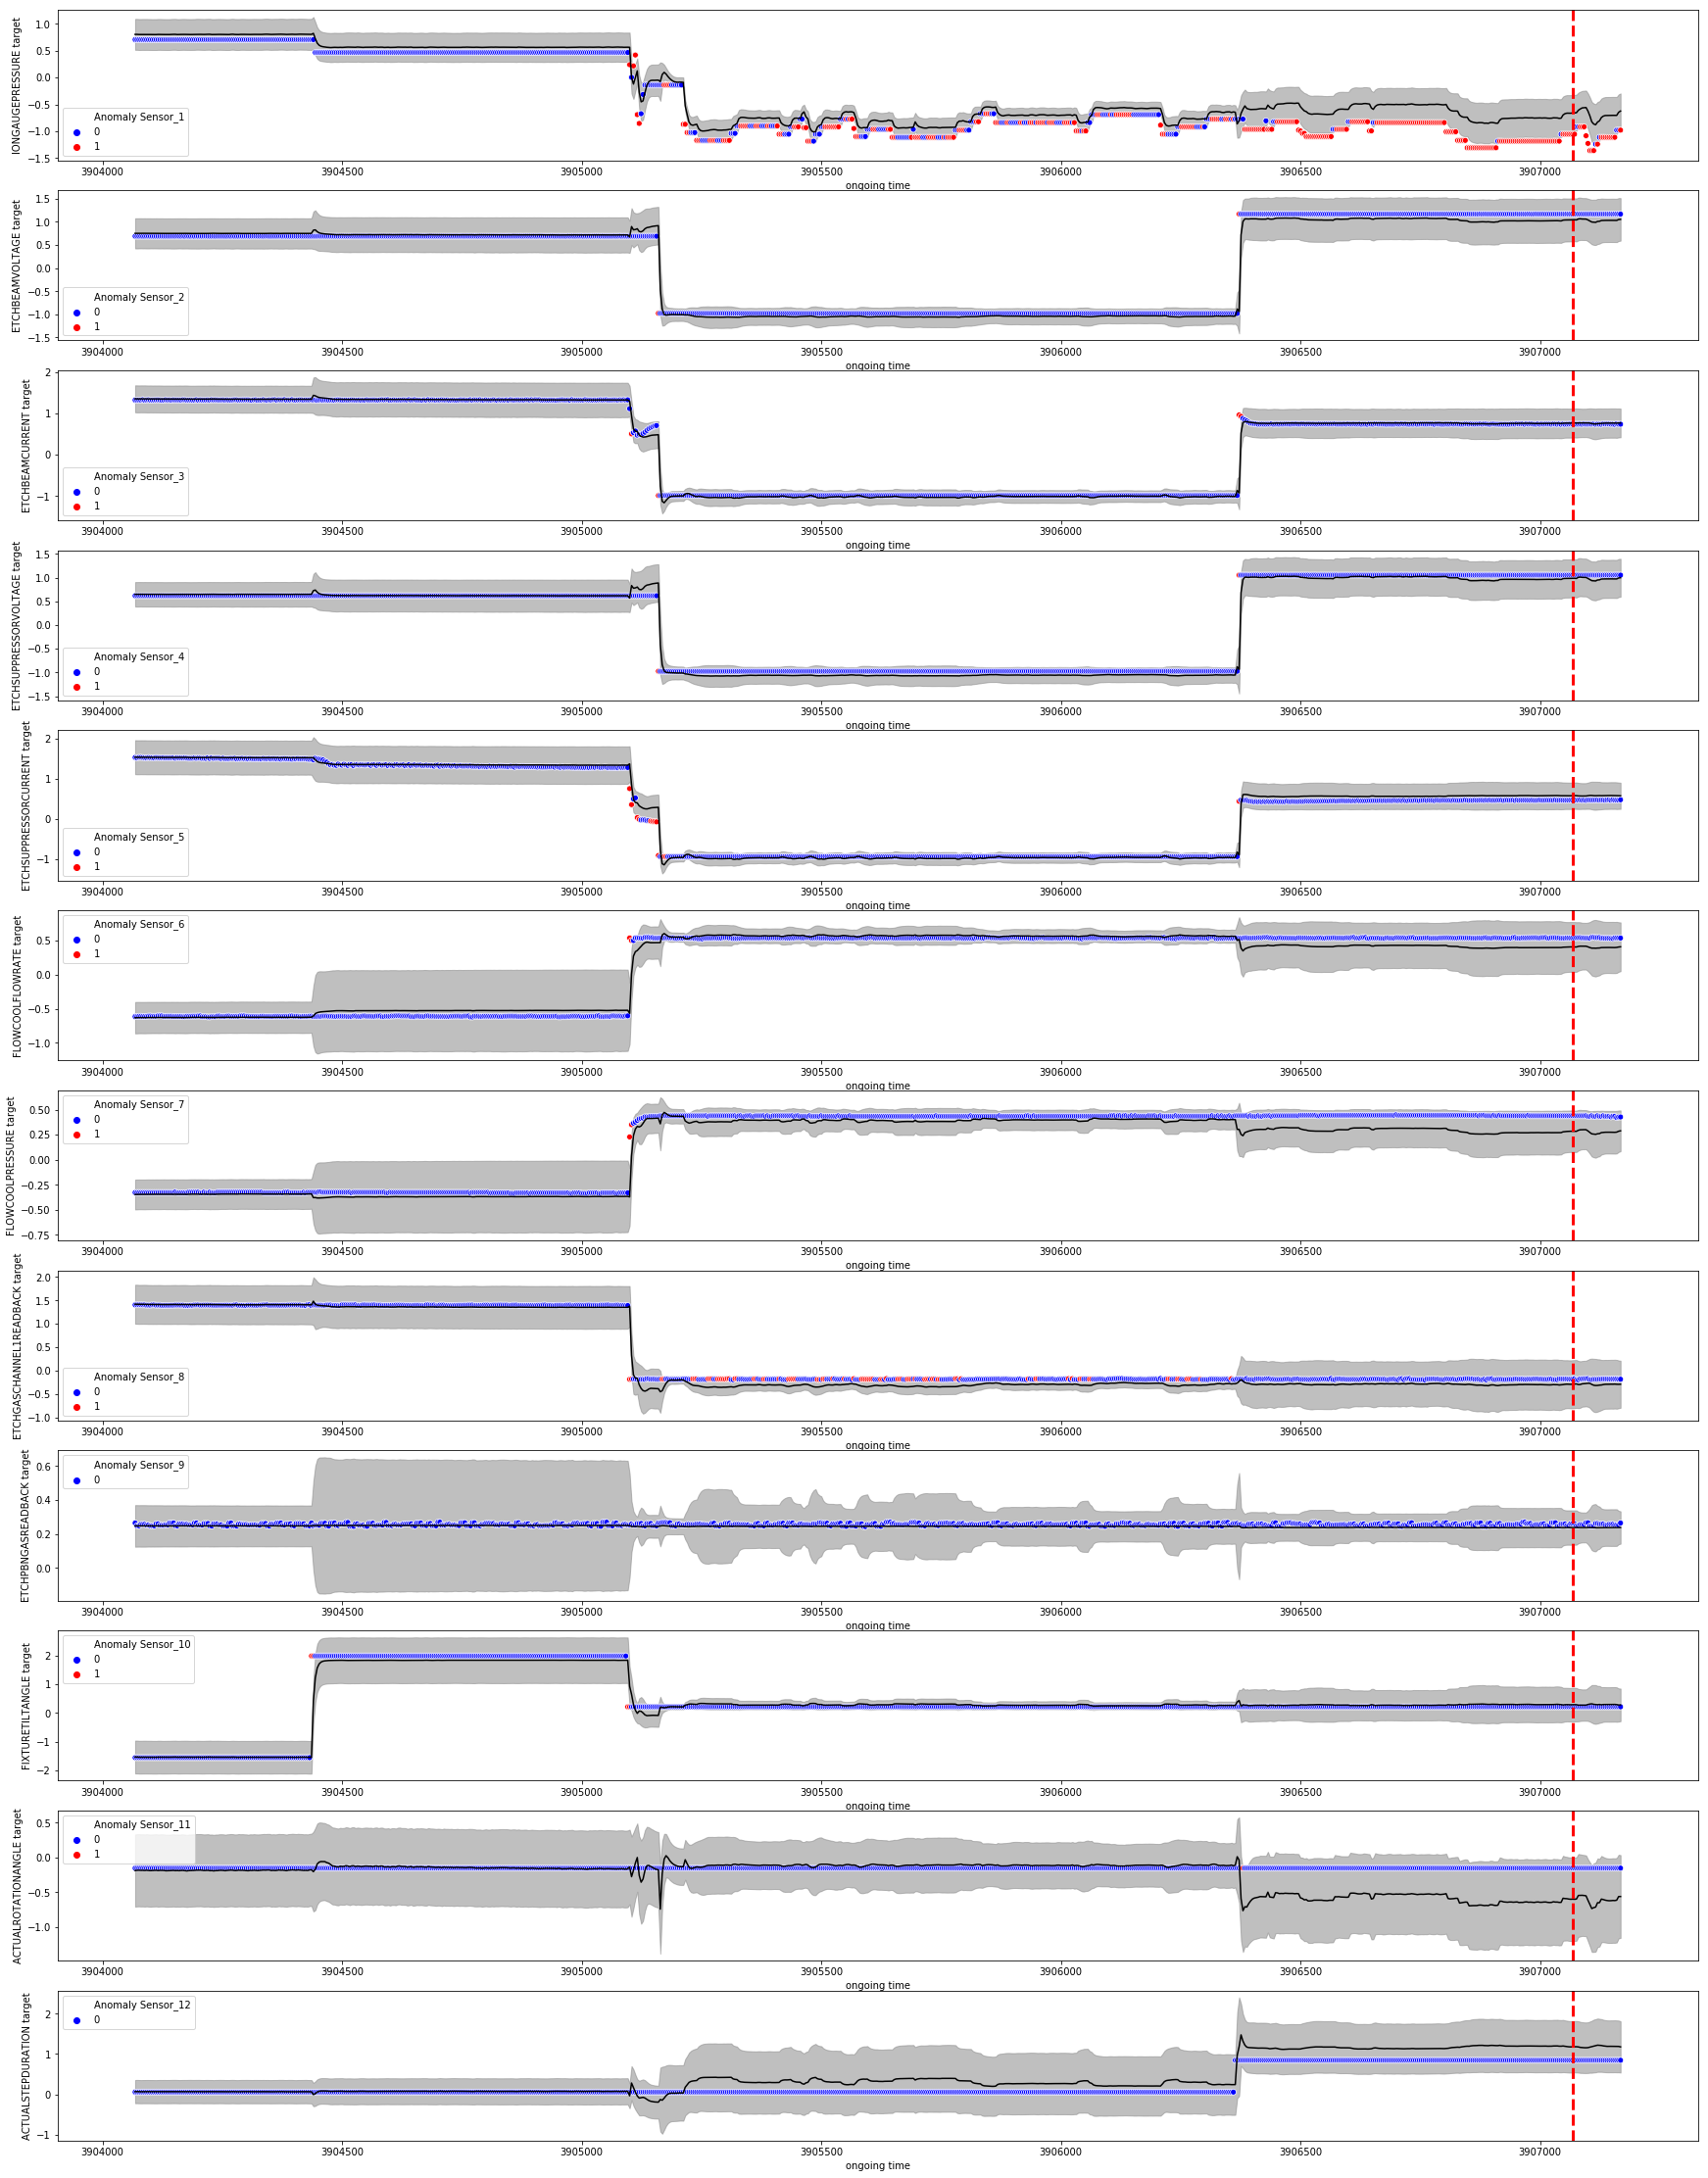

In [25]:
phm_data_11 = phm_data_1.loc[(phm_data_1["ongoing time"]>=3904068) & (phm_data_1["ongoing time"]<=3907168)]
visualise_mle_prediction(dataframe = phm_data_11,
                         time_column= "ongoing time", 
                         no_features=12, 
                         first_feature=1, 
                         last_feature=13,
                         breakdown=3907068,
                         line=True
                        )
plt.show()

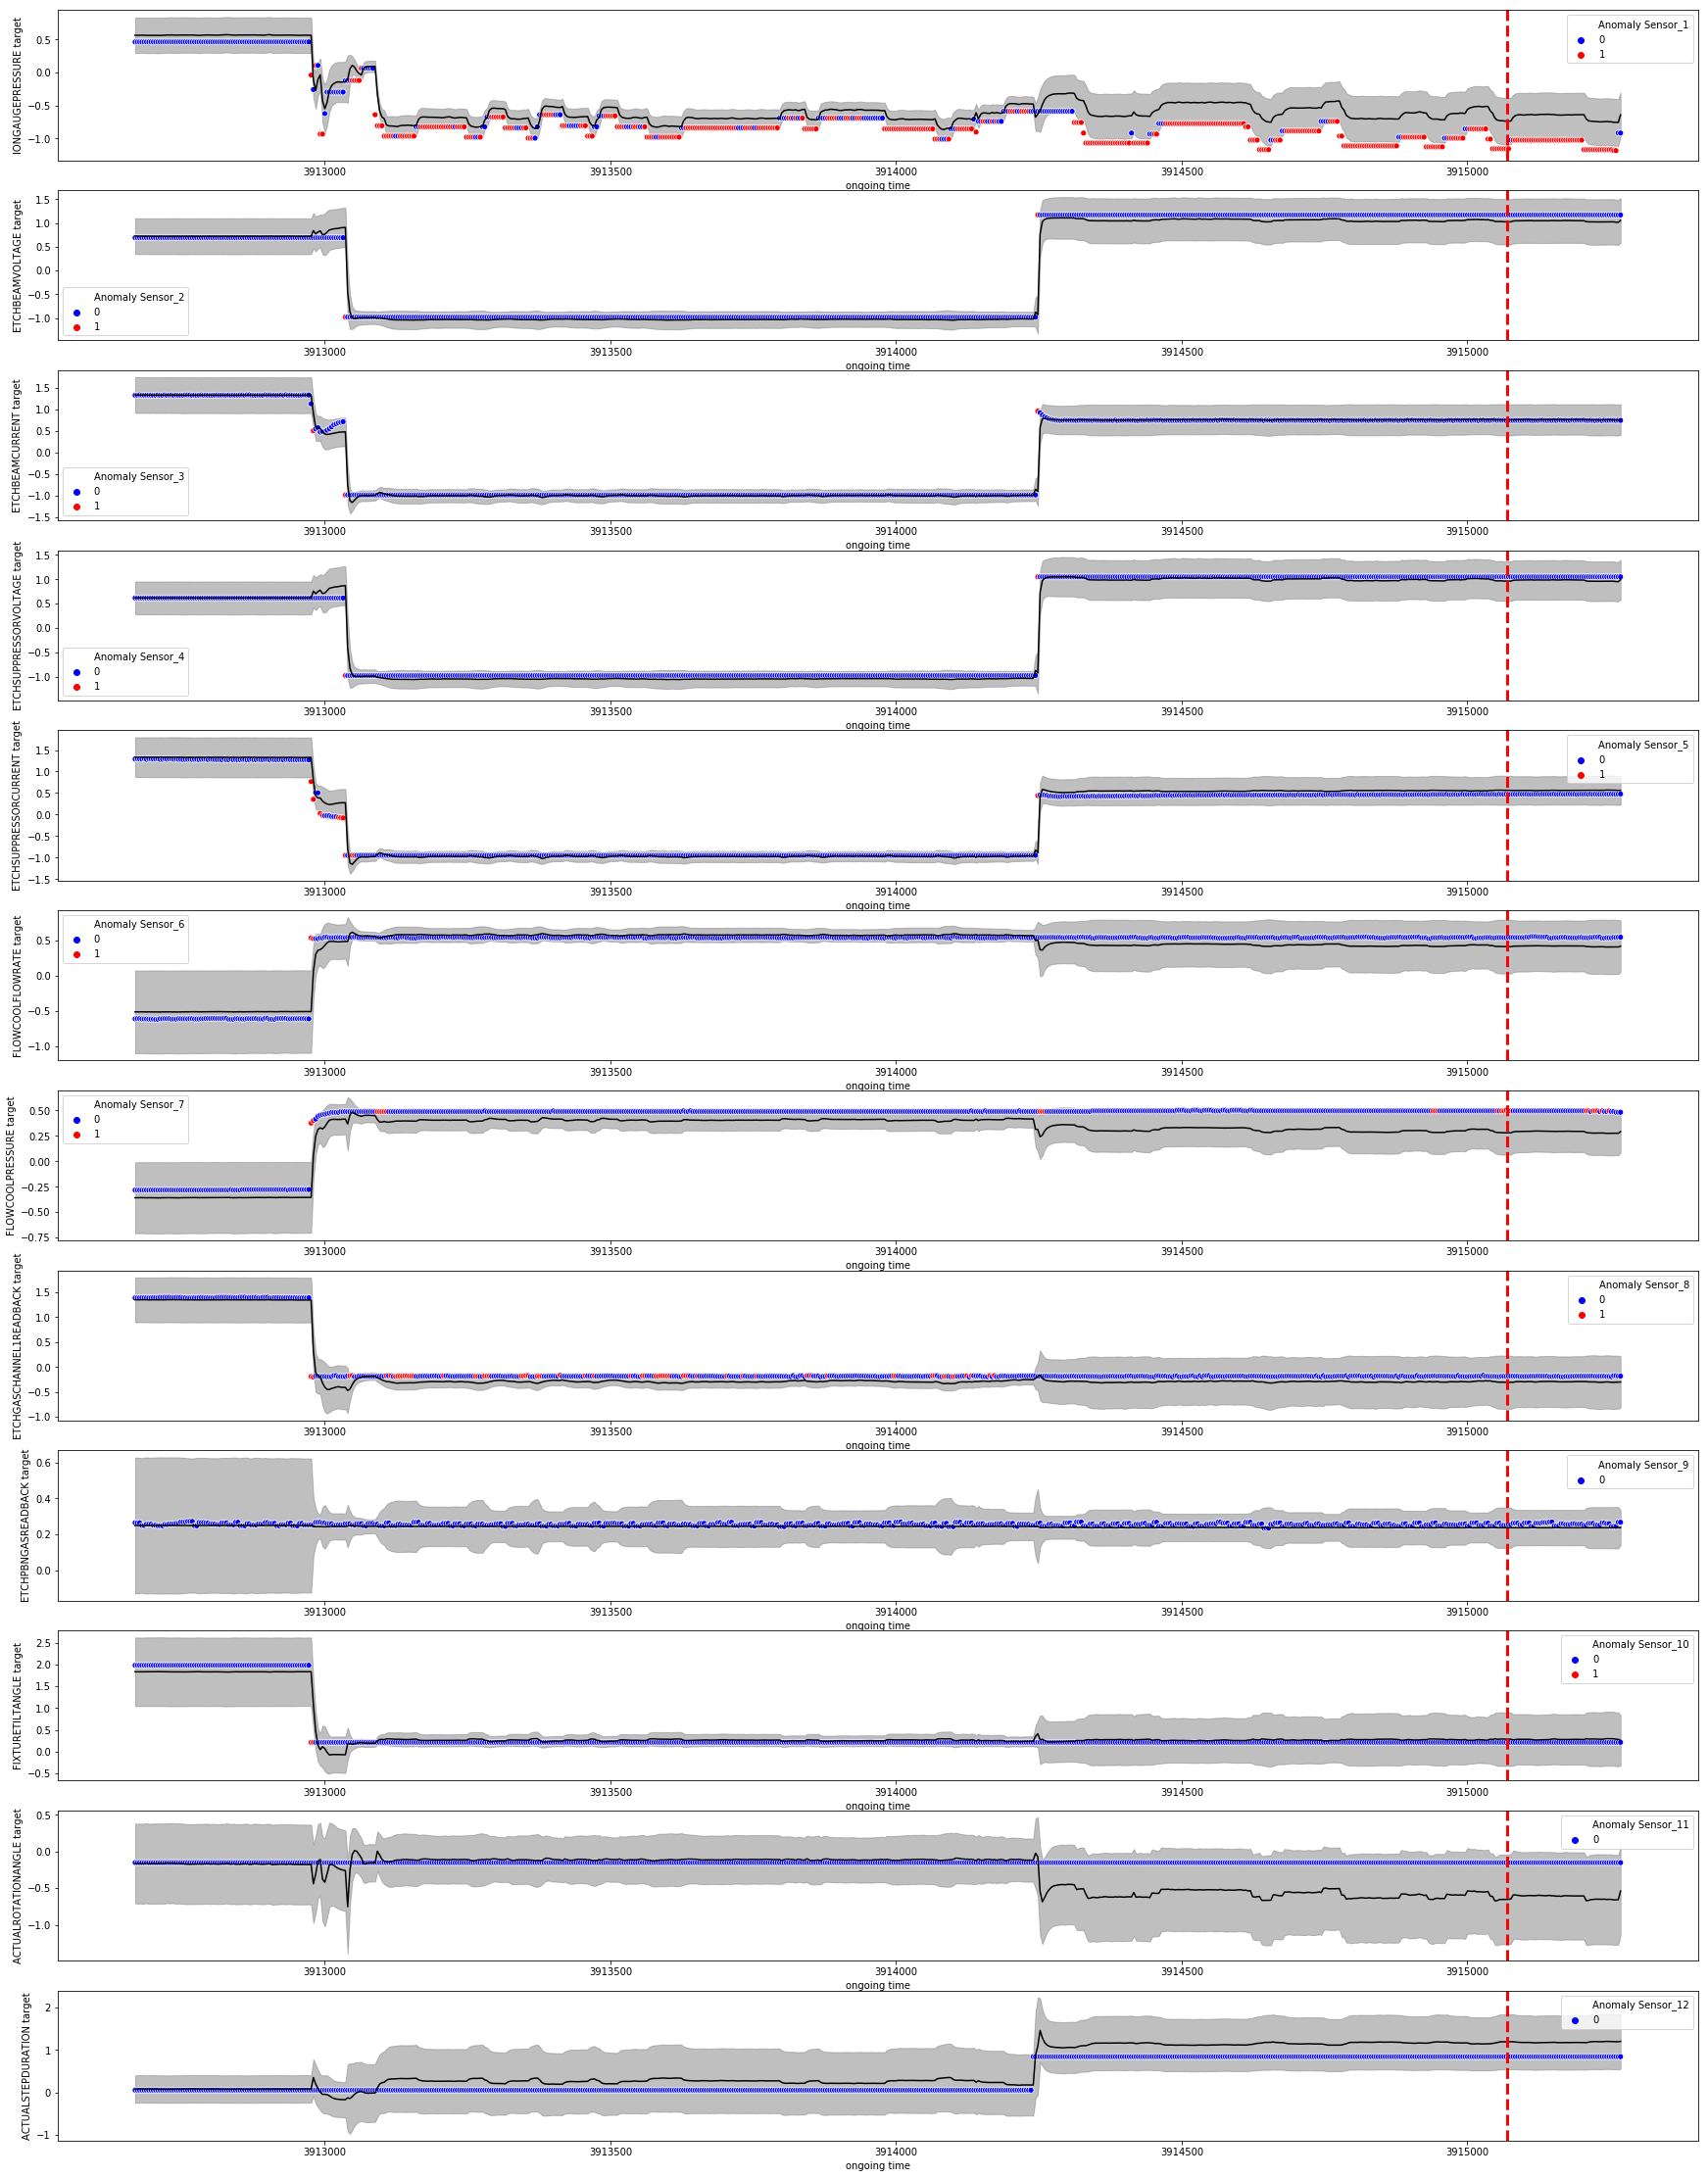

In [24]:
phm_data_12 = phm_data_1.loc[(phm_data_1["ongoing time"]>=3912668) & (phm_data_1["ongoing time"]<=3915268)]
visualise_mle_prediction(dataframe = phm_data_12,
                         time_column= "ongoing time",
                         no_features=12, 
                         first_feature=1, 
                         last_feature=13,
                         breakdown=3915070,
                         line=True
                        )
plt.show()

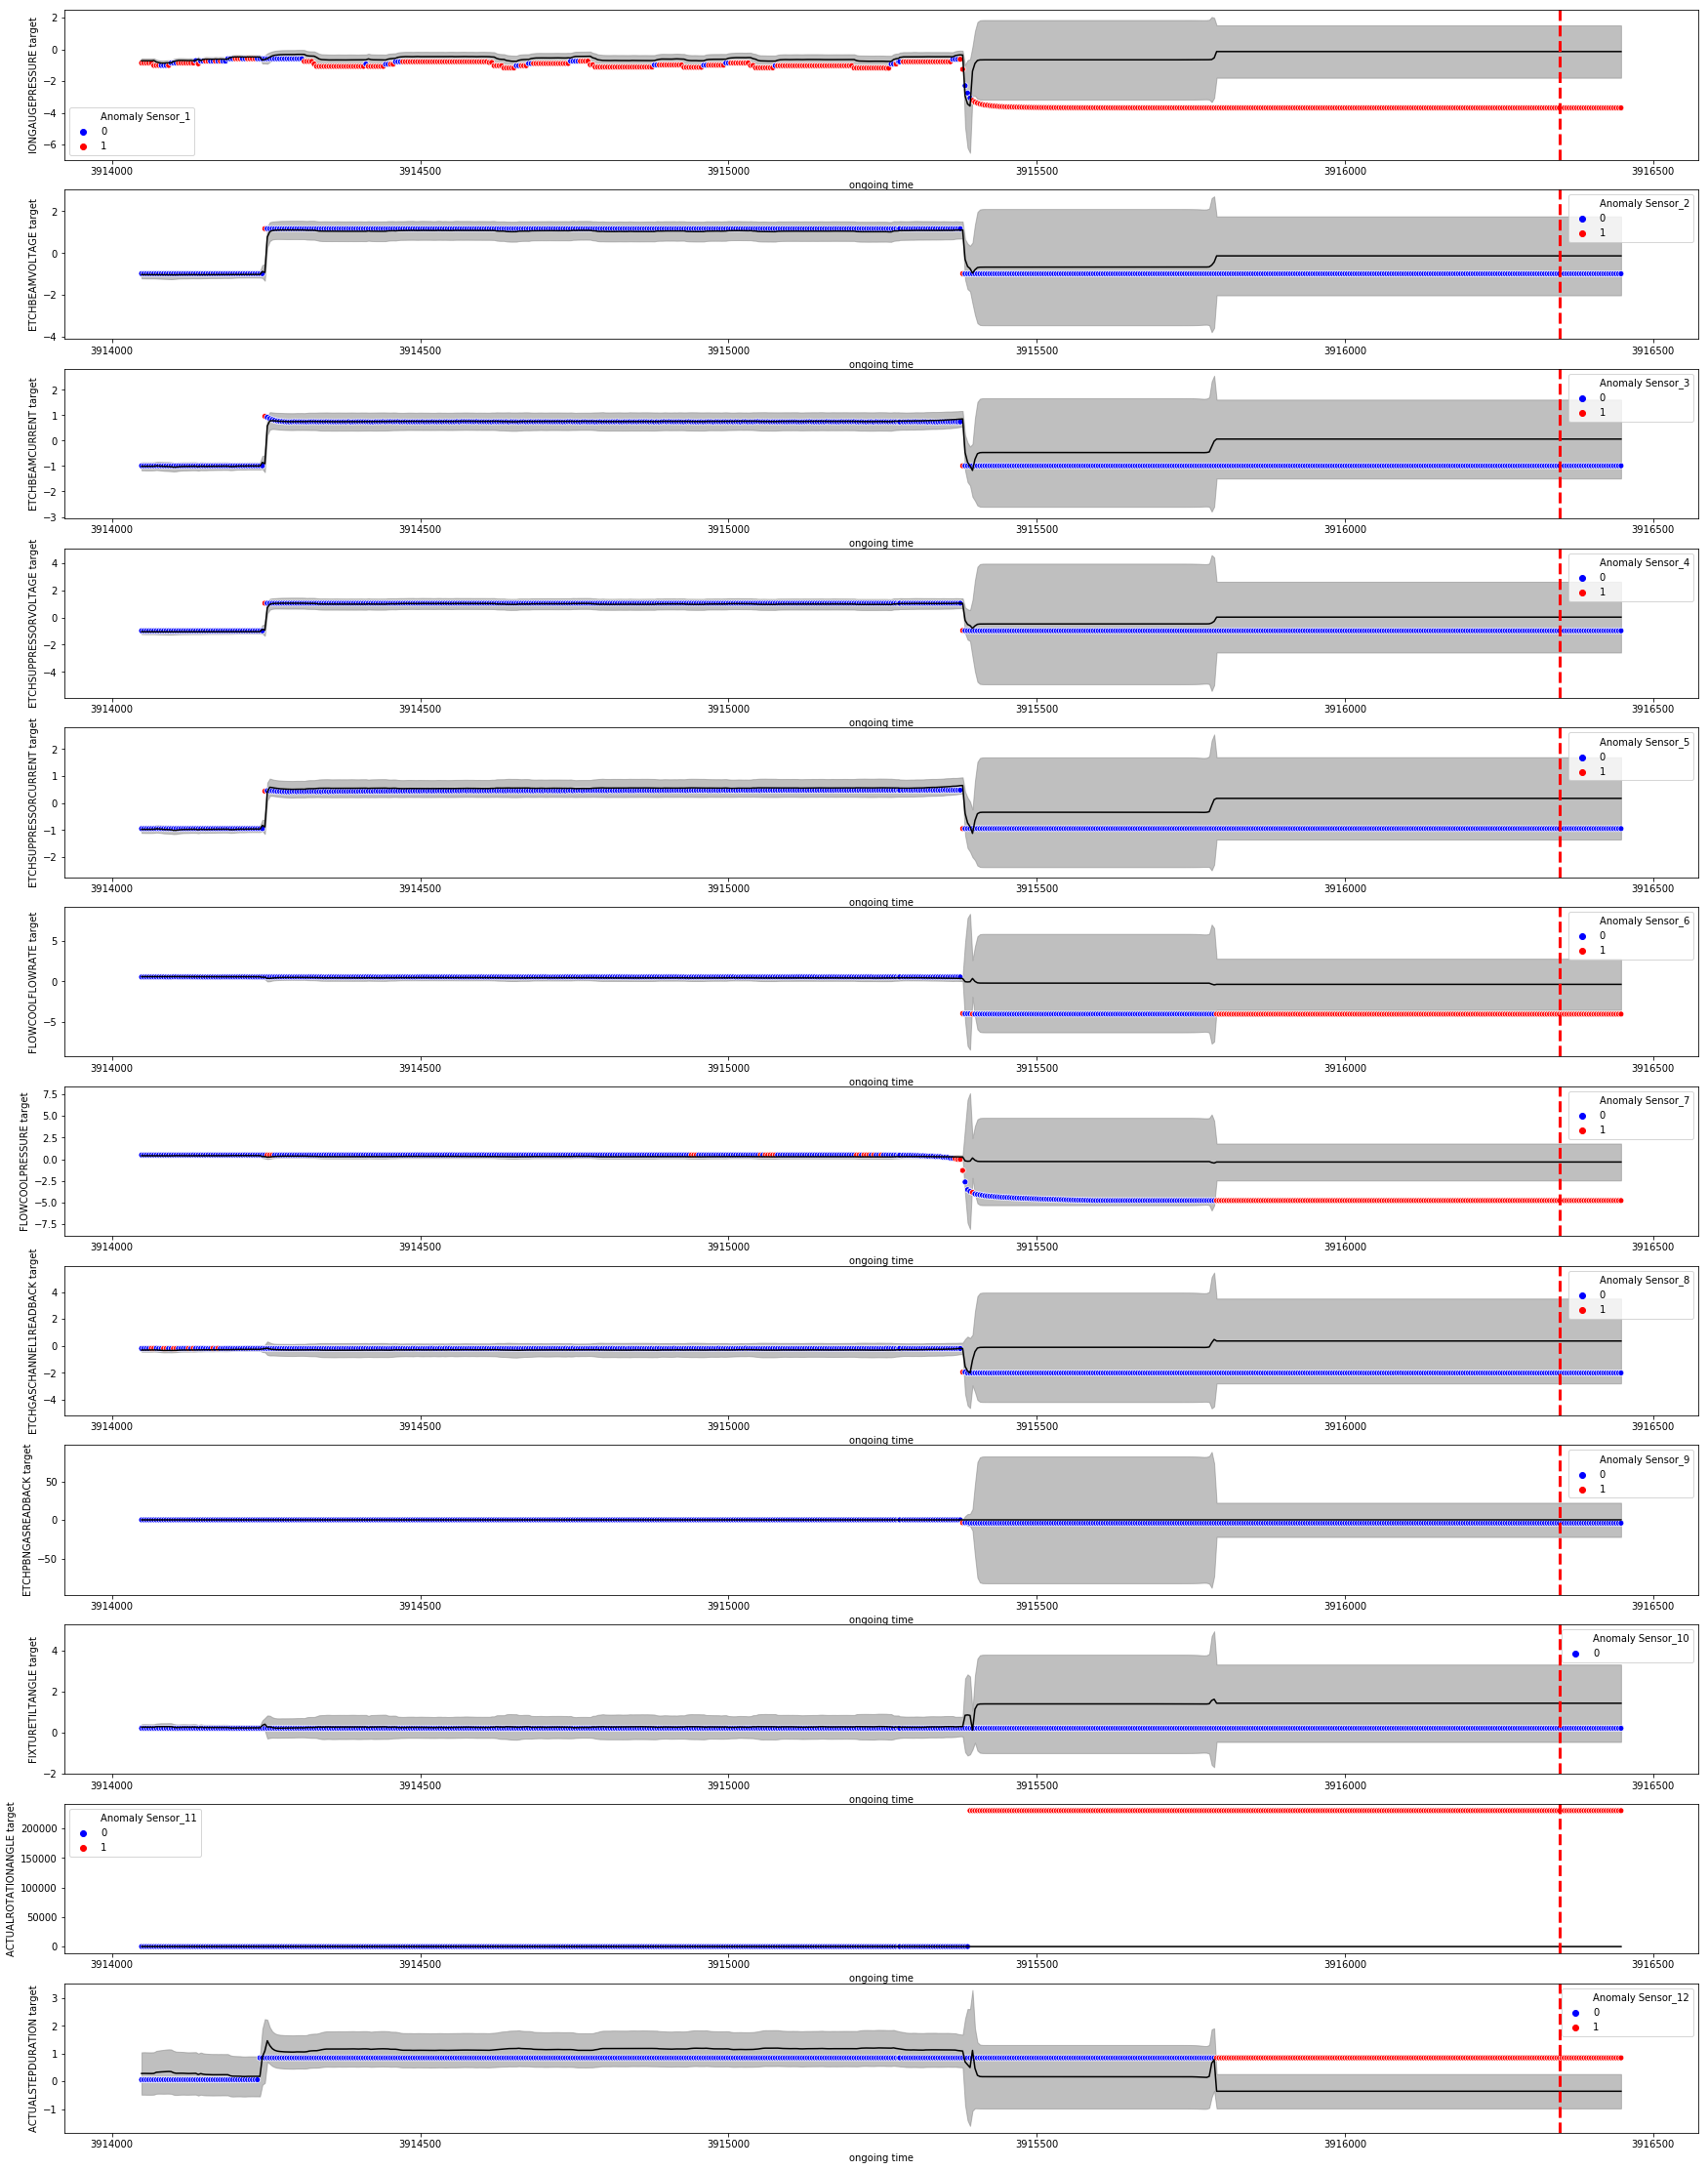

In [22]:
phm_data_13 = phm_data_1.loc[(phm_data_1["ongoing time"]>=3914048) & (phm_data_1["ongoing time"]<=3916448)]
visualise_mle_prediction(dataframe = phm_data_13,
                         time_column= "ongoing time",
                         no_features=12, 
                         first_feature=1, 
                         last_feature=13,
                         breakdown=3916348,
                         line=True
                        )
plt.show()

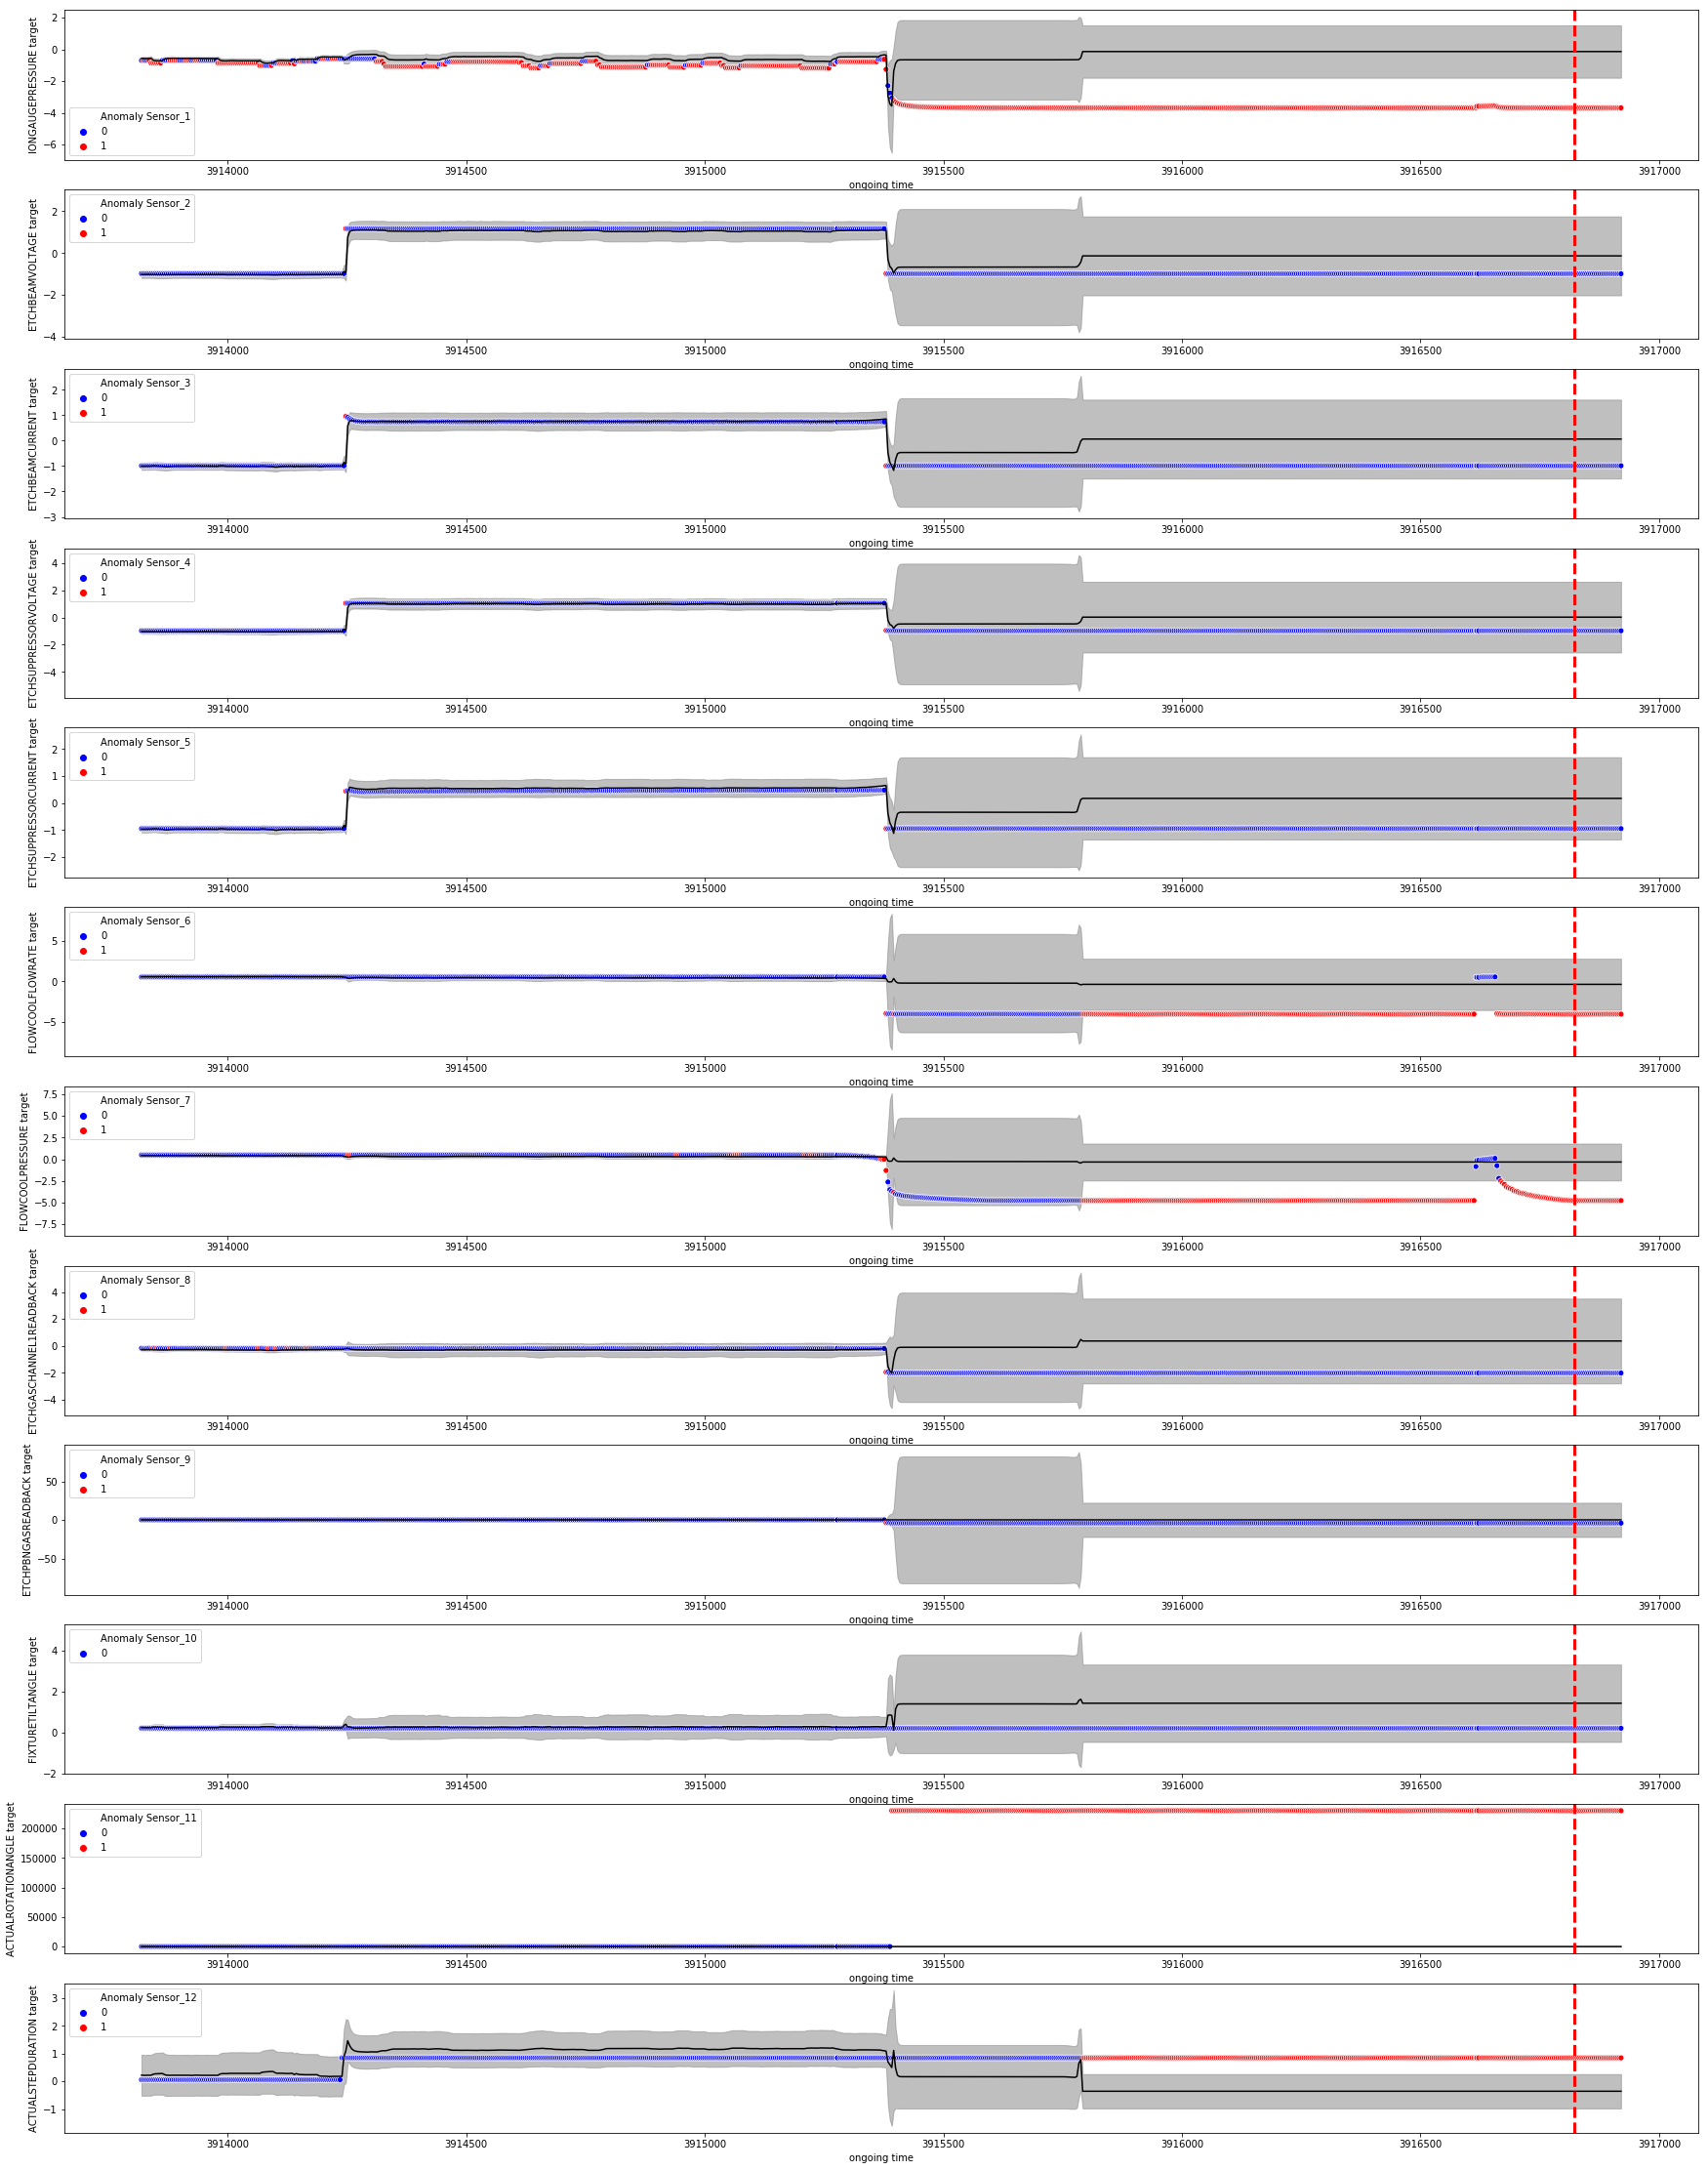

In [20]:
phm_data_13 = phm_data_1.loc[(phm_data_1["ongoing time"]>=3913820) & (phm_data_1["ongoing time"]<=3916920)]
visualise_mle_prediction(dataframe = phm_data_13,
                         time_column= "ongoing time",
                         no_features=12, 
                         first_feature=1, 
                         last_feature=13,
                         breakdown=3916822,
                         line=True
                        )
plt.show()

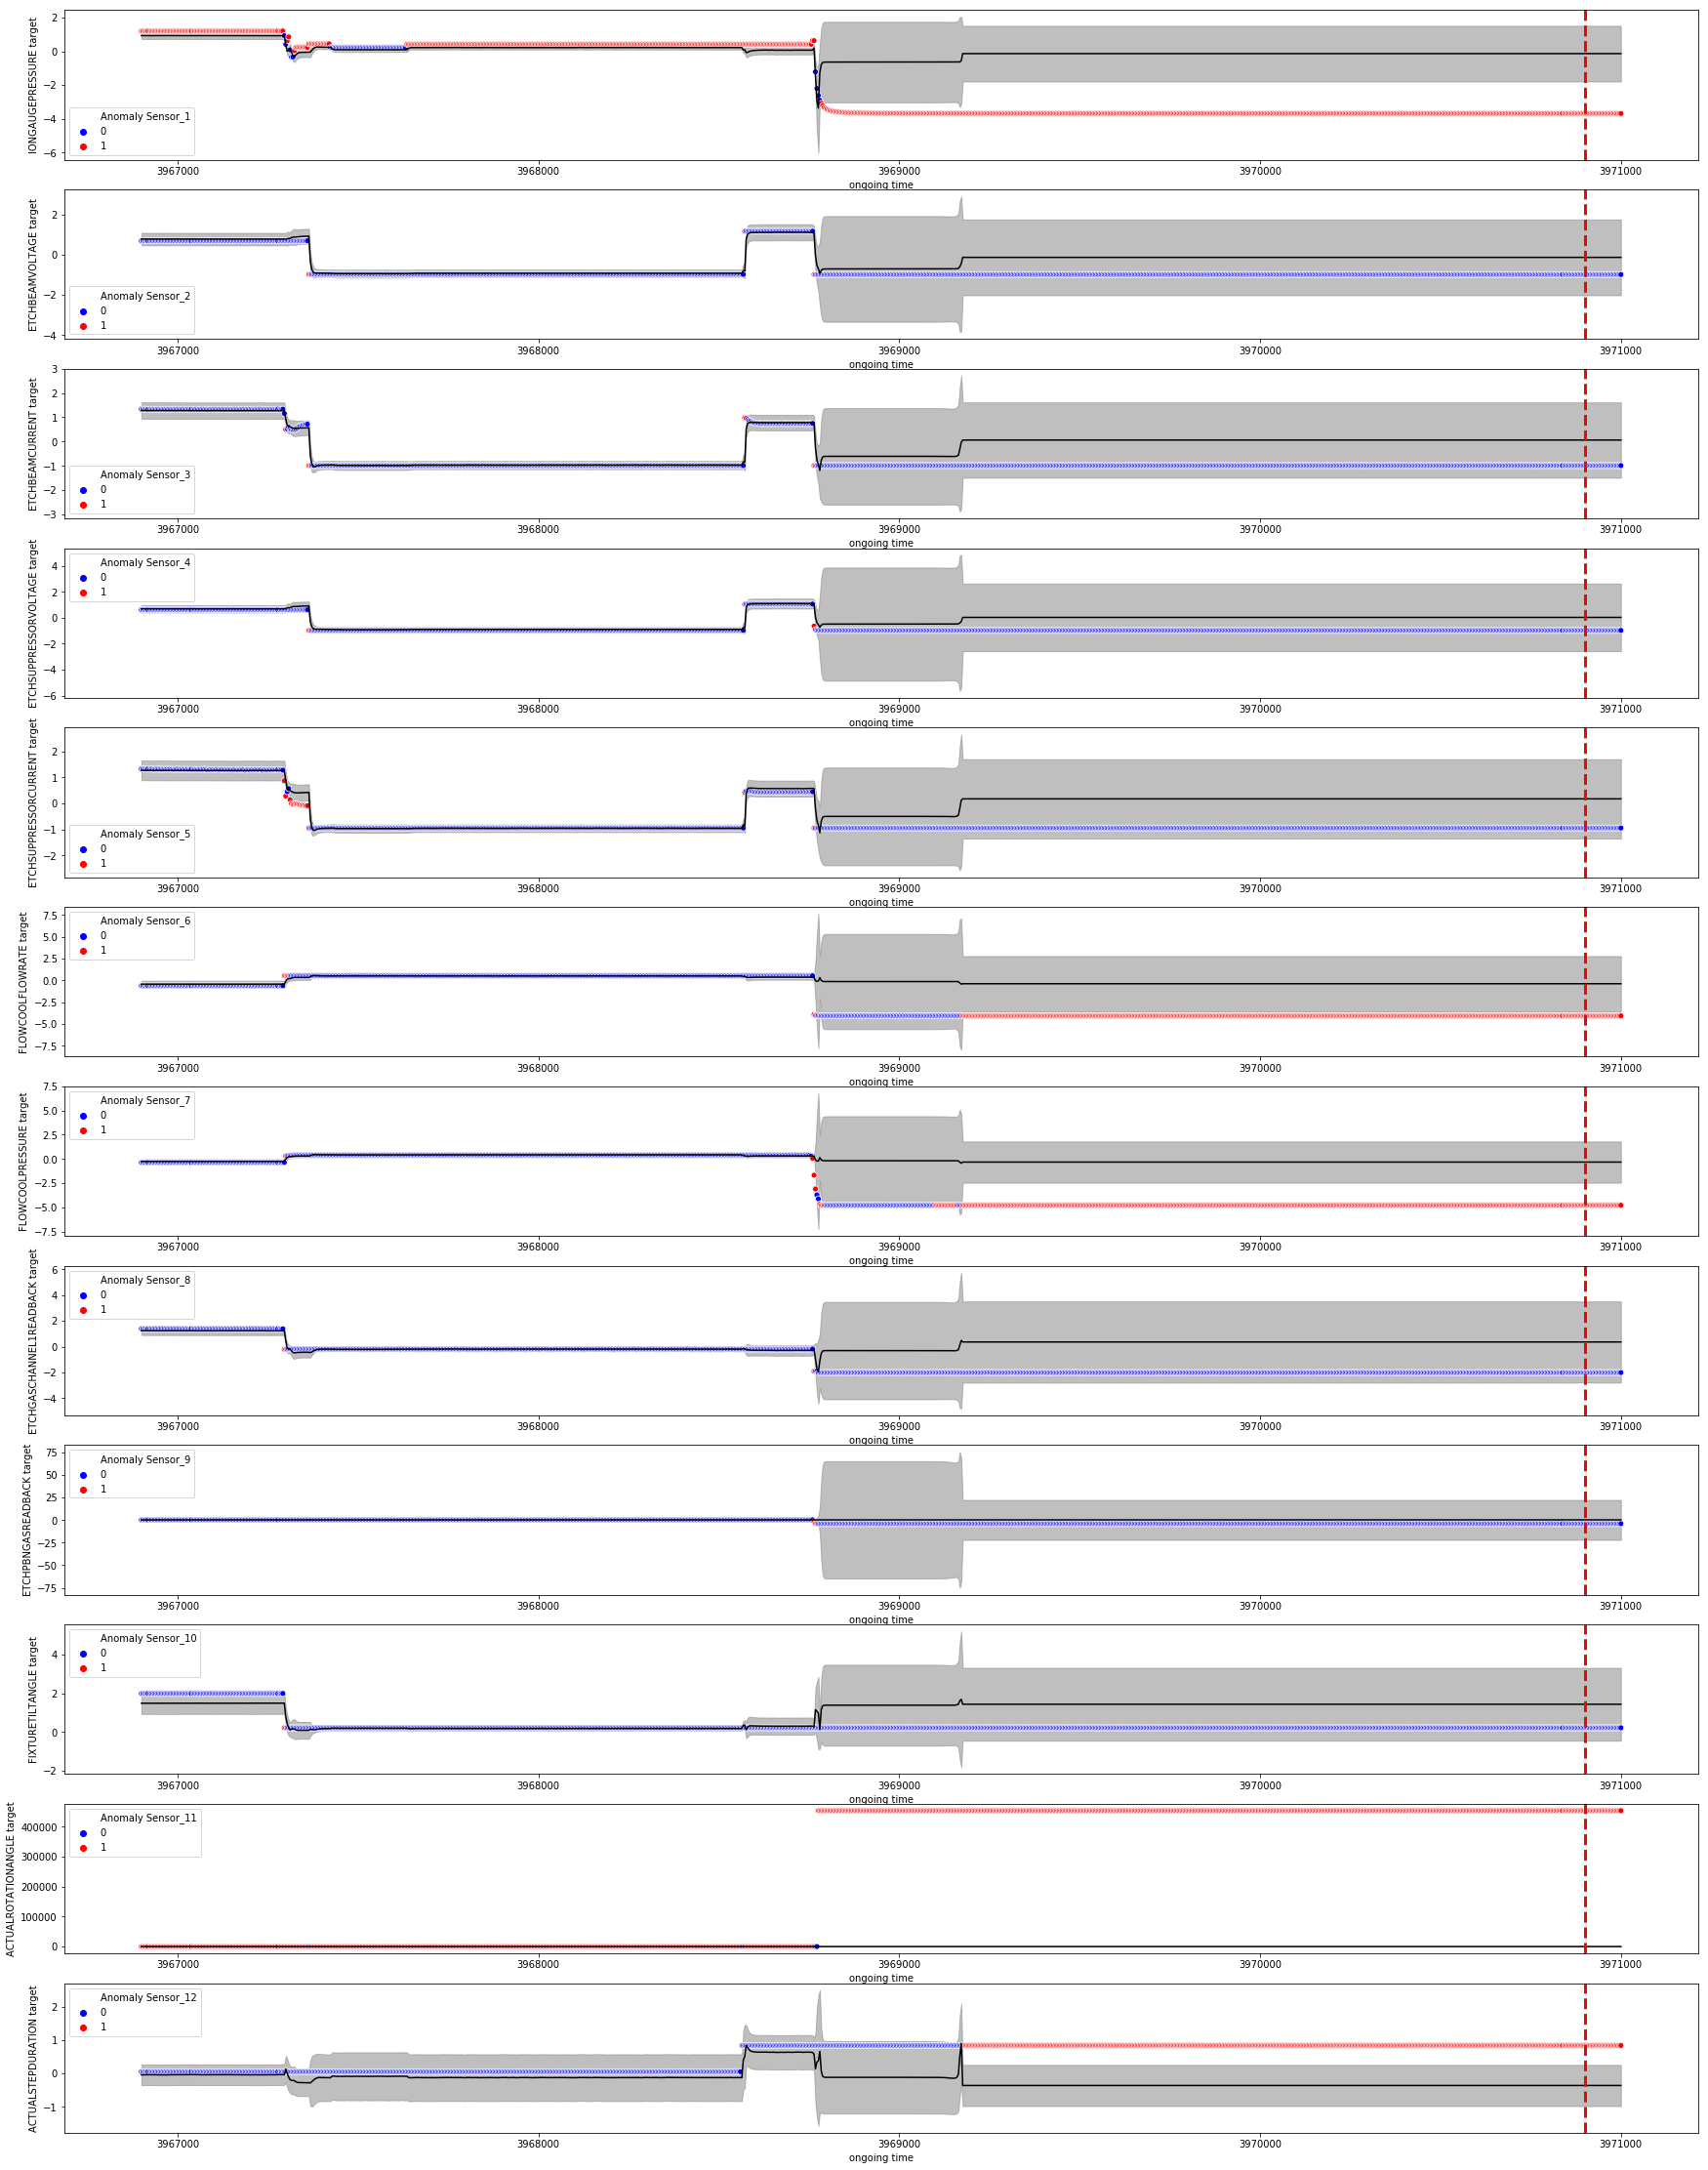

In [27]:
phm_data_13 = phm_data_1.loc[(phm_data_1["ongoing time"]>=3966900) & (phm_data_1["ongoing time"]<=3971000)]
visualise_mle_prediction(dataframe = phm_data_13,
                         time_column= "ongoing time",
                         no_features=12, 
                         first_feature=1, 
                         last_feature=13,
                         breakdown=3970900,
                         line=True
                        )
plt.show()

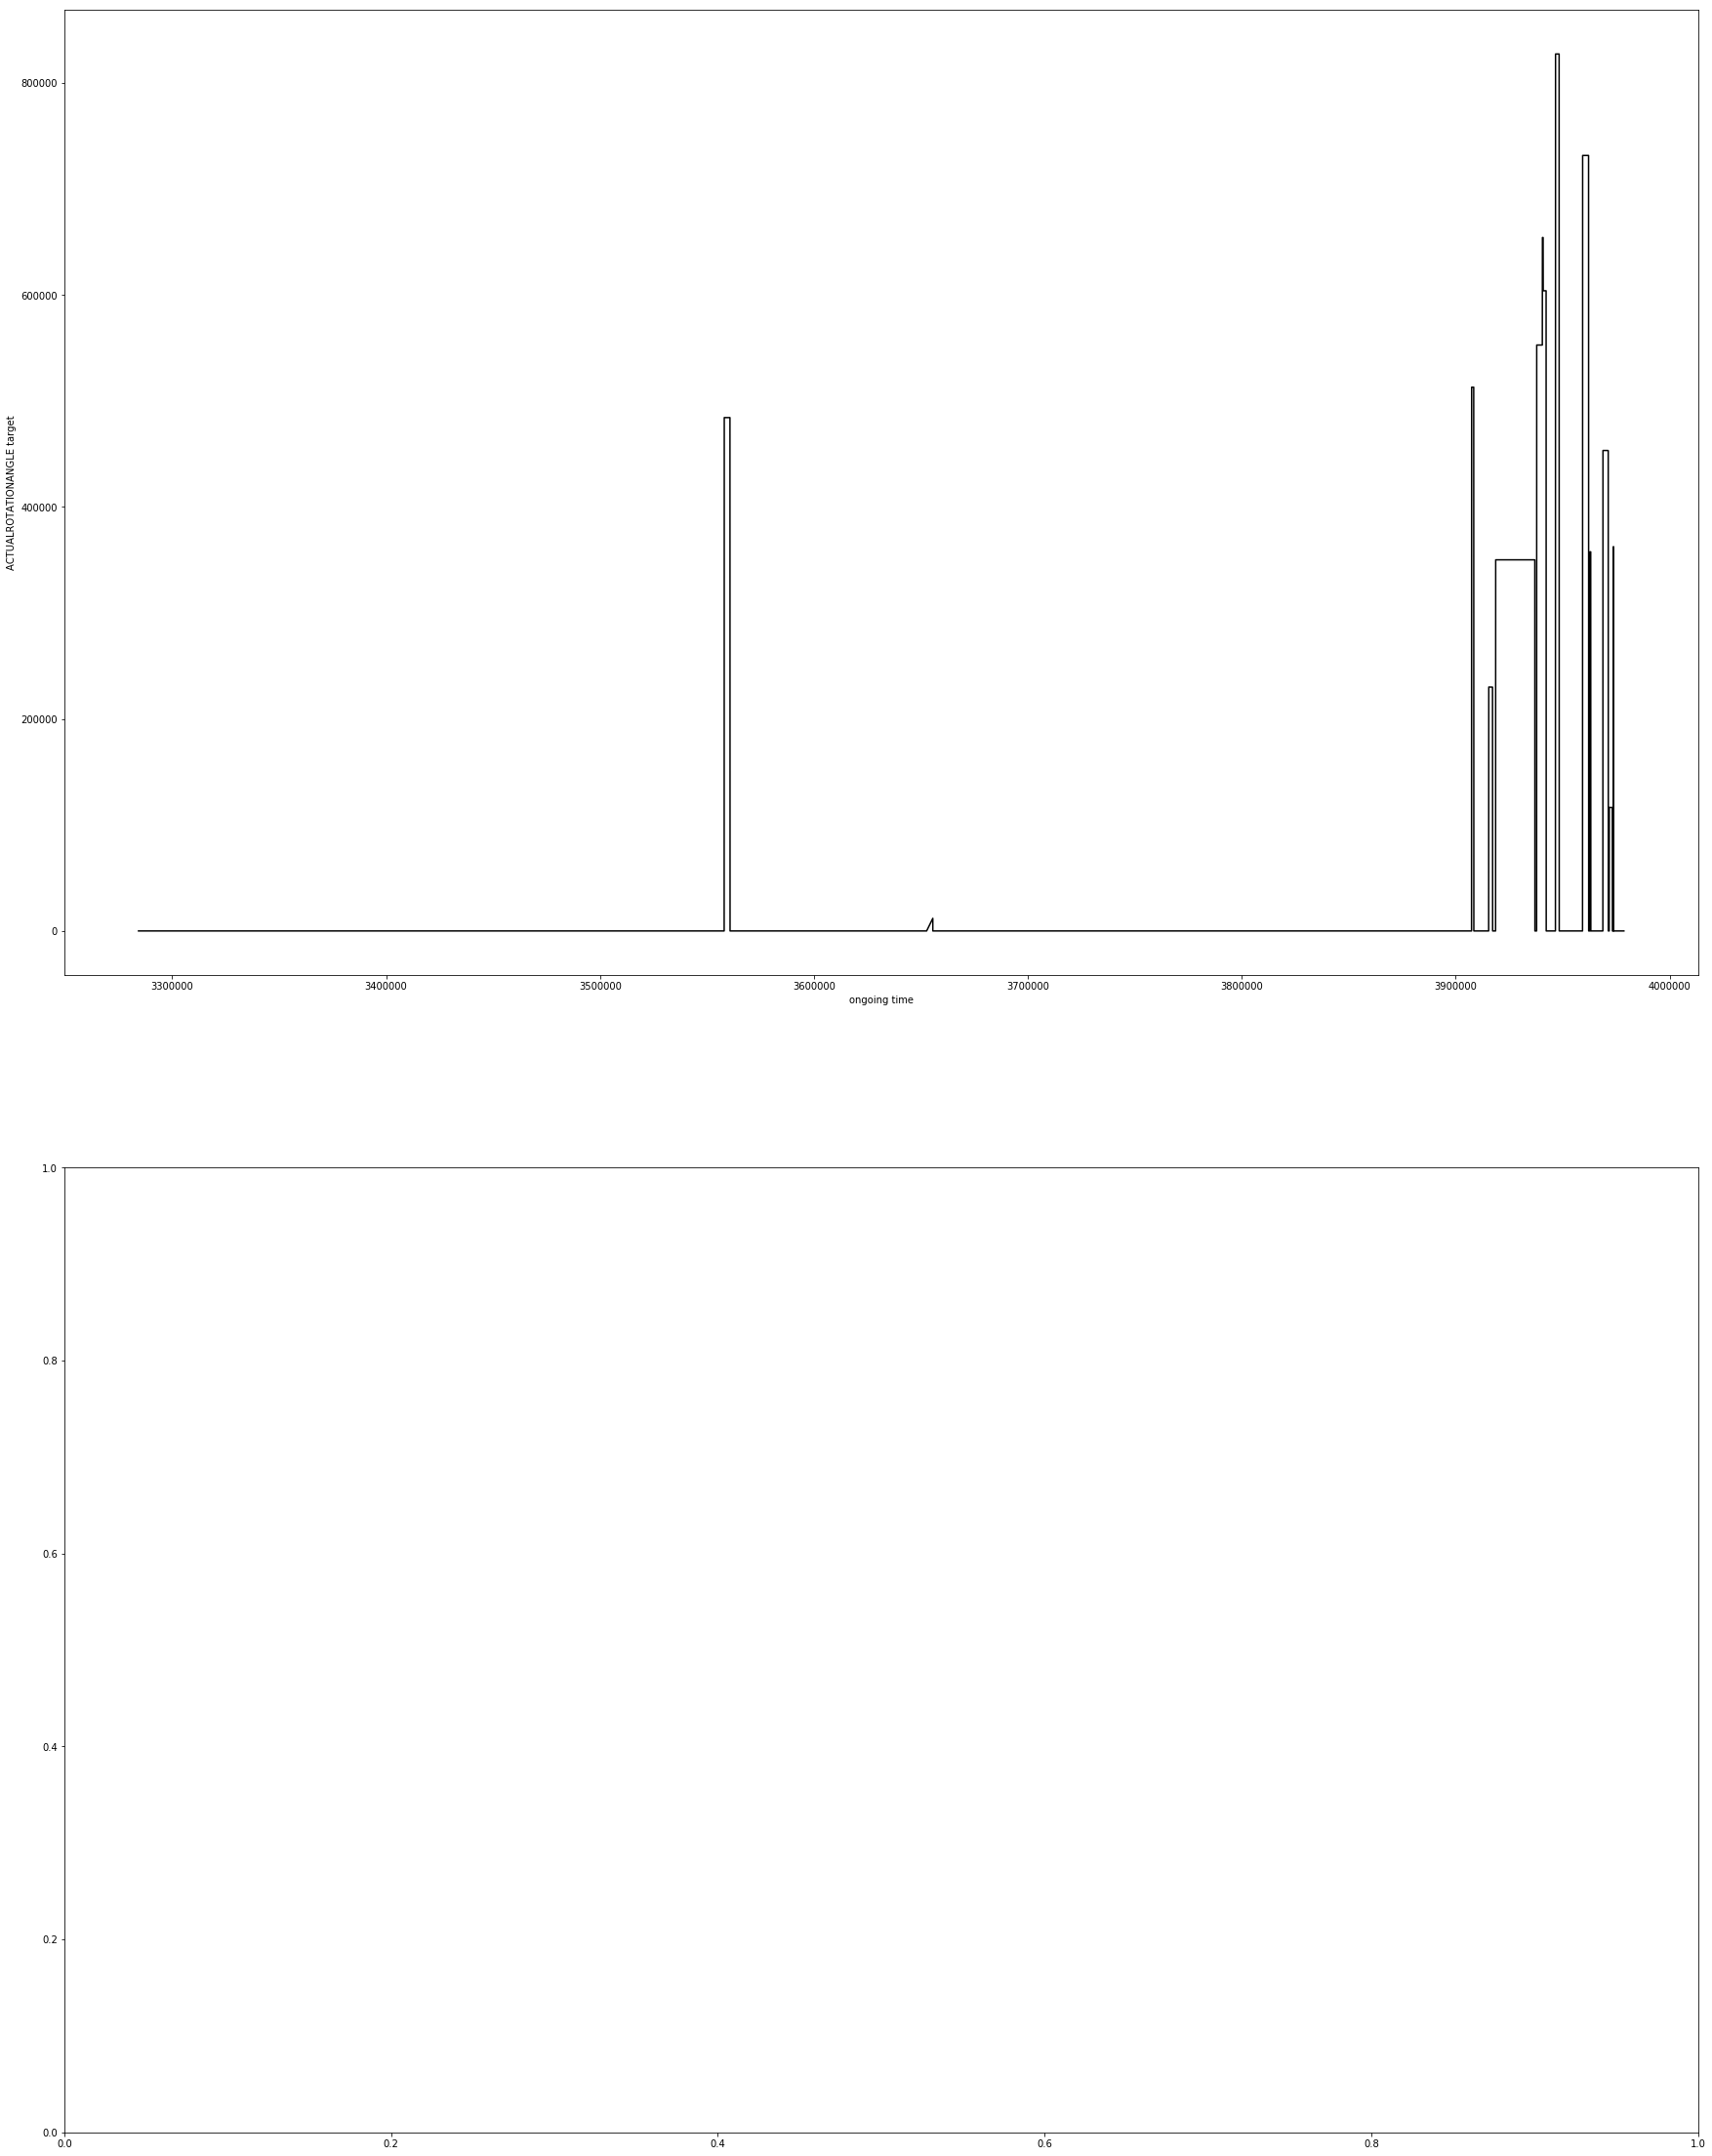

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(30,40))
ax = axes.ravel()
sns.lineplot(data=phm_data_1, x=phm_data_1["ongoing time"], y=phm_data_1["ACTUALROTATIONANGLE target"], ax=ax[0], color="black")
plt.show()